
Chapter Four: Stacks, queues, and dequeues
******************************************


Section 1. The stack abstract data type
---------------------------------------

A *stack* is a collection of objects inserted and removed according to the *last-in first-out* principle (LIFO).
A user may access the stack, adding one object or removing the most recently inserted one, only.
This object is called the *top* of the stack.
Thus, the fundamental operations on a stack involve the *pushing* of an object into, and the *popping*
of an object from the stack.
The straightforward example is that of a stack of plates in a spring-loaded, cafeteria plate dispenser.

Stacks are among the fundamental data structures, and they are used in many applications.
For instance, the list of recently visited sites in a web browser is implemented as a stack;
each time a site is visited, its address is pushed into the stack, and each time the "back" button is hit,																
the browser pops to the previously visited site.
Another example is the “undo” mechanism in text editors.

Formally, a stack \\(S\\) is an abstract data type supporting two methods (an error occurs every time \\(S\\) is empty):

- **S.push(e)**: add element e to the top of S;
- **S.pop()**: return the top element from S, and remove it.

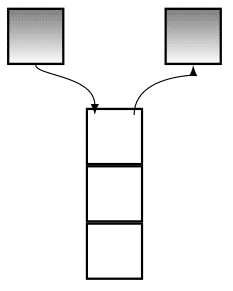

More accessor methods are defined:

- **S.top()**: return the top element of S, without removing it;
- **S.is_empty()**: return True if S does not contain any elements;
- **len(S)**: return the number of elements in S.

A new stack is created empty, and there is no limit on the capacity of the stack.
Elements added to the stack can have arbitrary type.

Section 1.1 Implementation by means of a Python list
====================================================

A stack can be implemented by means of a Python list.
The ``list`` class supports adding an element to its end (with the ``append`` method), and removing its last element
(with the ``pop`` method);
if we define the top of the (being defined) stack as the end of the list, the previous methods of a stack
can be easily defined.
It seems natural to think that the ``list`` class could be used directly as a stack, without defining 
the ``stack`` class;
but this would break the pure abstraction of the new ADT,
given that a ``list`` class includes more methods than those belonging to a stack.

figura42.png

In what follows, we show how to use a list to implement a stack.
In particular, we define a new class that performs some of the same functions of an existing class,
repackaged in a more convenient way.
We define the new ``stack`` class in such a way that it contains an instance of the existing
``list`` class as a hidden field,
and we implement each method of the new class using methods of this hidden instance variable.
This adaptation is outlined in the following table.


| Stack methods | Realization with Python list |
| --- | --- |
|S.push(e) |     L.append(e)|
|S.pop( )   |    L.pop( )|
|S.top()    |    L[−1]|
|S.is empty( ) |  len(L) == 0|
|len(S)        | len(L)|


The formal definition is in the following piece of code:

In [2]:
class Empty(Exception):
    '''Error when trying to access an element from an empty list'''
     pass


class ArrayStack:
    '''LIFO Stack implementation using a Python list as storage'''

    # Creates an empty stack
    def __init__(self):
      self._data = [ ]

    # Returns the number of elements in the stack
    def __len__(self):
        return len(self._data)

    # Returns True if the stack is empty
    def is_empty(self):
        return len(self._data) == 0

    # Adds element e to the top of the stack
    def push(self, e):
        self._data.append(e)

    # Returns (but don't remove) the element at the top of the stack
    # raising an exception if the stack is empty
    def top(self):
        if self.is_empty():
            raise Empty('Stack is empty')
        return self._data[-1]

    # Remove and return the element from the top of the stack
    # raising an exception if the stack is empty
    def pop(self):
        if self.is_empty():
            raise Empty('Stack is empty')
        return self._data.pop()

Note that when the user calls ``pop`` or ``top`` when the stack is empty, an error must occur.
In order to make this happen, we define the exception class ``Empty`` as follows:

    # Error when trying to access an element from an empty list
    class Empty(Exception):
        pass

Below, we show an example of the use of the Stack class, with operations, contents of the stack, and output, respectively.


|Operations|Contents of the stack|Output|
| :--- | :--- | :--- |
|S=Stack( )     |      [ ]|
|S.push(5)     |       [5]|
|S.push(3)    |        [5, 3]|
|print(len(S))     |   [5, 3]|                2
|print(S.pop( ))  |    [5]|                   3
|print(S.is empty())|  [5]|             False
|print(S.pop( ))    |  [ ]|                   5
|print(S.is empty())|  [ ]|             True
|S.push(7)        |    [7]|
|S.push(9)       |     [7, 9]|
|print(S.top( ))|      [7, 9]|                9
|S.push(4)     |       [7, 9, 4]|
|print(len(S))|        [7, 9, 4]|             3

The analysis of the previous (array-based) stack implementation mirrors the analysis of a list class.
``top``, ``is_empty``, and ``len`` use constant time, in the worst case;
a typical call to ``push`` and ``pop`` uses constant time, but an \\(O(n)\\)-time worst
case is possible (\\(n\\) is the current number of elements in the stack), when an operation
causes the list to resize its internal array. The space usage for a stack is \\(O(n)\\).

The stack from the previous code fragment begins with an empty list that is expanded, when needed;
a more efficient implementation can be obtained by constructing a list with initial length \\(n\\) if,
for some reason, we know in advance that the stack will reach this size.
In this case, the constructor could accept a parameter specifying the maximum capacity of the stack ,
and could initialize the data member to a list of that length.
This implies that the size of the stack would no longer be synonymous with the length of the list,
and pushes and pops would not require changing the length of the list.

Section 1.2 Example: reversing a stack
======================================

A stack can be used as a tool to reverse a data sequence.
If the values 1, 2, and 3 are pushed onto a stack in that order, they will be
popped from the stack in the order 3, 2, and 1.
This behaviour can be used in a variety of cases.
For example, suppose we want to print lines of a file in reverse order;
this can be accomplished by reading each line and pushing it onto a stack, and then writing the lines
in the order they are popped. An implementation of such a process is given in the following code:

In [3]:
def reverse_file(filename):
    '''Overwrite a file with its contents line-by-line reversed'''
    S = ArrayStack()
    original = open(filename)
    for line in original:
        S.push(line.rstrip( '\n' ))   # re-insert newlines when writing
    original.close( )

    # overwrite with contents in LIFO order
    output = open(filename,'w' )       # reopening file overwrites original
    while not S.is_empty( ):
        output.write(S.pop( ) + '\n' )       # reinsert newline characters
    output.close( )

Section 1.3 Matching Parentheses
================================

Two useful applications of stacks are related to the test of pairs of matching delimiters,
like parentheses or HTML tags.
Consider arithmetic expressions that may contain various pairs of grouping symbols, such as
parentheses "(" and ")", braces "{" and "}", and brackets "[" and "]",
where each opening symbol must match its corresponding closing symbol.
For example, the strings 

    ( )(( )){([( )])} 
    ((( )(( )){([( )])})) 

are correct,
while 

    )(( )){([( )])}
    ({[ ])}
    ( 
        
are incorrect.

An important task when processing arithmetic expressions is to make sure that the grouping symbols match up correctly.
In the following code the reader can find a Python implementation of such an algorithm:

In [4]:
def ismatched(expr):
    '''Returns True if all delimiters match properly; False otherwise'''
    lefty = '({['           # opening delimiters
    righty = ')}]'          # closing delimiters
    S = ArrayStack()
    for c in expr:
        if c in lefty:
            S.push(c)           # push left delimiter on stack
        elif c in righty:
            if S.is_empty():
                return False          # nothing to match with
        if righty.index(c) != lefty.index(S.pop( )):
            return False          # mismatched
    return S.is_empty()       # all symbols matched

Given a sequence of characters as input, a left-to-right scan is performed.
Each time an opening symbol is encountered, that symbol is pushed into \\(S\\);
each time a closing symbol is encountered, a pop from the stack \\(S\\) is performed (assuming \\(S\\) is not empty),
and it is checked that these two symbols form a valid pair.
If the end of the expression is reached, and the stack is empty, then the original expression was properly matched.
Otherwise, there must be an opening symbol on the stack without a matching closing symbol.

If the length of the original expression is \\(n\\), the algorithm will make at most
\\(n\\) calls to push and \\(n\\) calls to pop, running in \\(O(n)\\) time.

Section 1.4 Matching HTML Tags
==============================

Another useful application of matching delimiters is in the checking of languages like HTML or XML.
HTML is a markup language, and it represents the standard format for documents on the Internet;
XML is an extensible markup language used for a variety of structured data sets.

Portions of text in a HTML document are delimited by tags.
An opening tag is written as `<name>`, while the corresponding closing tag is `</name>`.
Common tags are `<body>` (the document body), `<h1>` (a section header), `<center>` (center justify),
`<p>` (a paragraph), together with tags for ordered and numbered lists.
Each opening tag should match with its closing one, as in the previous matching parentheses problem.
In order to check if a HTML document has this property,
the following code is defined, such as opening tags are pushed into the stack,
and matched against closing tags as they are popped from the stack.
The algorithm runs in \\(O(n)\\) time, where \\(n\\) is the number of characters in the raw HTML source:

In [7]:
def is_matched_html(raw):
    '''Returns True if all HTML tags match properly; False otherwise'''
    S = ArrayStack()
    j = raw.find('<')                 # find first < character
    while j != -1:
        k = raw.find('>' , j+1)         # find next > character
        if k == -1:
            return False                  # invalid tag
        tag = raw[j+1:k]                # strip away < >
        if not tag.startswith( '/' ):   # this is an opening tag
            S.push(tag)
        else:                           # this is a closing tag
            if S.is_empty():
                return False                # nothing to match with
            if tag[1:] != S.pop():
                return False                # mismatched delimiter
        j = raw.find('<', k+1)          # find next < character (if any)
    return S.is_empty()              # were all opening tags matched?

Section 2 The queue abstract data type
--------------------------------------

A *queue* is a collection of objects that are inserted and removed according to the *first-in first-out* principle (FIFO).
That is, elements enter a queue at the back and are removed from the front.
Apart to the obvious application of queues, they are used by many computing devices, such as a networked printer,
web server responding to requests, or operating systems.

In order to enforce the FIFO principle, the queue abstract data type defines a collection of objects
where element access and deletion are allowed on the first element in the queue,
and element insertion is allowed on the back of the sequence.

Formally, a queue \\(Q\\) is an abstract data type supporting two methods (an error occurs if \\(Q\\) is empty):

- **Q.enqueue(e)**: add element e to the back of queue Q;
- **Q.dequeue()**: remove and return the first element from queue Q.

figura43.png

The queue ADT also includes the following supporting methods:

- **Q.first()**: return the element at the front of queue Q, without removing it;
- **Q.is_empty( )**: return True if queue Q does not contain any elements.
- **len(Q)**: return the number of elements in queue Q.

A new queue is created empty, and there is no limit on the capacity of the queue.
Elements added to the queue can have arbitrary type.

Section 2.1 Implementation by means of a Python list
====================================================

The straightforward approach for the implementation of a ``queue`` ADT could be to adapt a Python ``list`` class,
in the same way we have done for the ``stack`` ADT.  We could enqueue an element e by calling ``append(e)`` to
add it to the end of the list; and we could use the syntax ``pop(0)`` (as opposed to ``pop()``),
to remove the first element from the list.
This solution is highly inefficient; when ``pop`` is called on a list with a non-default index,
all elements beyond the specified index must be shifted to the left,
in order to "fill the hole" in the sequence caused by the pop.
A call to ``pop(0)`` always causes the worst-case scenario when the entire list has to be shifted (in \\(O(n)\\) time).

Another solution could avoid the call to ``pop(0)``, entirely.
We could replace the dequeued element in the array with a reference to ``None`` (avoiding the harmful shifting),
and store the index of the element that is currently at the front of the queue in a variable.
Such an algorithm for dequeue would run in \\(O(1)\\) time.

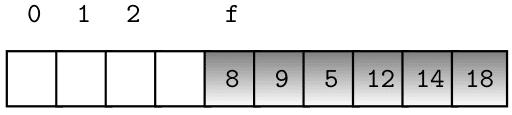

There is a drawback to this approach: the length of the underlying list can become arbitrarily large,
while the elements of the queue are very few.
Consider, for instance, the case of a repeated sequence of enqueue and dequeue of elements
(that is, queues with a small size, but used for a long period of time);
over time, the size of the underlying list would grow to \\(O(m)\\),
where \\(m\\) is the total number of enqueue operations
since the creation of the queue, rather than the actual number of elements in the queue.

Section 2.2 Implementation by means of a circular array
=======================================================

An efficient queue implementation can be created by using the *circular array* structure.
Assume that the underlying array has fixed length \\(N\\), that is greater that the actual number of elements in the queue.
We allow the head of the queue to drift rightwards (as in the previous implementation),
but we also allow that a new element is enqueued into the first free element of the array,
starting from the front to index \\(N−1\\), and continuing at index 0, then 1, if the indexed elements are free.

The only requirement consist in computing the front index \\(f\\) when an element is dequeued.
This value is \\((f+1)\% N\\) , with \\(a\% b\\) the remainder of \\(a\\) divided by \\(b\\).
For example, if the list has length equal to 10, and front index 7, the new front index is \\((7+1) \% 10\\),
which is 8, as expected.
If the front index is 9 (the last in the array), the "advanced" index will evaluates to index 0,
meaning that we have to enqueue the new element into the first position of the array.

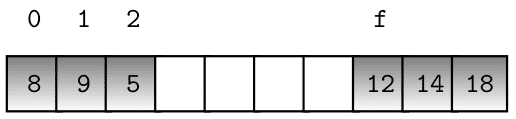

An implementation of a ``queue`` ADT using a Python circular list is presented in the following code.
The new class maintains the three instance variables:

- `_data`: a reference to a list instance with a fixed capacity;
- `_size`: the current number of elements stored in the queue;
- `_front`: the index of the first element of the queue within `_data`.

Although the queue has size zero, initially, we reserve a list of moderate size for storing data,
with the front index equal to zero.
An Empty exception is raised when ``front`` or ``dequeue`` are called with no elements in the queue.
In the following code we introduce an implementation of a queue that uses the previous ideas:

In [9]:
class ArrayQueue:
    '''queue implemented with a list'''
    DEFAULT = 10  # capacity of all queues

    def __init__(self):
        self._data = [None]*ArrayQueue.DEFAULT
        self._size = 0
        self._front = 0

    def __len__(self):
        return self._size

    def is_empty(self):
        return self._size == 0

    def first(self):
        if self.is_empty( ):
            raise Empty('Queue is empty')
        return self._data[self._front]

    def dequeue(self):
        if self.is_empty( ):
            raise Empty('Queue is empty')
        element = self._data[self._front]
        self._data[self._front] = None
        self._front = (self._front + 1) % len(self._data)
        self._size -= 1
        return element

    def enqueue(self, e):
        if self._size == len(self._data):
            self._resize(2*len(self.data))  # double the array size
        position = (self._front + self._size) % len(self._data)
        self._data[position] = e
        self._size += 1

    def _resize(self, capacity):
        old = self._data  # keeps track of existing list
        self._data = [None]*capacity  # allocate list with new capacity
        walk = self._front
        for k in range(self._size):
            self._data[k] = old[walk]  # shifts the indices
            walk = (1 + walk) % len(old)  # use old size
        self._front = 0  # realigs front

The ``enqueue`` method adds a new element to the queue.
To do this, the proper index is computed by
``position = (self._front + self._size) % len(self._data)``.
For example, consider a queue with capacity 10, current size 3, and first element at index 5.
This means that the elements of such a queue are stored at indices 5, 6, and 7;
The new element is placed at index (5+3) % 10 = 8.
If the queue has 3 elements with the first at index 8, the new element is placed at index (8+3) % 10 = 1,
since the three existing elements occupy indices 8, 9, and 0.

When the ``dequeue`` method is called, ``element = self._data[self._front]`` is the element that will be removed
and returned, and ``self._front`` is the index of this value.
Then, the value of ``_front`` is updated, in order to reflect the removal of the element,
and the second element to become the new first; because of the circular configuration,
this value is computed by modular arithmetic, as before.

The ``resize`` method is called when the size of the queue and the size of the underlying list (\\(N\\)) are equal,
simply doubling the length of the list.
This is done by creating a temporary reference to the old list, by allocating a new list that is twice the size,
and by copying references from the old list to the new list.
During the copy, the front of the queue is realigned with index 0 in the new array.

A sensible improvement of the previous code should be to reduce the array
to half of its capacity when the actual number of
elements is equal or less than one quarter of its capacity. In fact, the given implementation expands the array
every time its full capacity is reached, but it never reduces the array.
This implies that the capacity of the underlying array is proportional to the maximum
number of elements that have ever been stored in the queue, not the current number of elements.

In order to achieve this property, we can add
the following two lines of code in the ``dequeue`` method, just before the last line ``return element``::

    if 0 < self._size < len(self._data) / 4:
        self._resize(len(self._data) / 2)

Finally, we observe that all the methods rely on a constant number of statements involving arithmetic operations,
comparisons, and assignments. Therefore, each method runs in worst-case \\(O(1)\\) time, except for the ``resize`` utility.

Section 3 Double-ended queue
----------------------------

A *double-ended queue* (deque) is a data structure that supports insertion and deletion at both
the front and the back of the queue. This abstract data type is more general than the ``stack`` and the ``queue`` ADTs.

Formally, the ``deque`` ADT is defined so that it supports the following methods
(an error occurs if the deque is empty):

- **D.add_first(e)**: add element e to the front of deque D;
- **D.add_last(e)**: add element e to the back of deque D;
- **D.delete_first( )**: remove and return the first element from deque D;
- **D.delete_last( )**: remove and return the last element from deque D.

figura46.png

The deque will include the following accessors:

- **D.first()**: return (but do not remove) the first element of deque D;
- **D.last()**: return (but do not remove) the last element of deque D;
- **D.is_empty( )**: return True if deque D does not contain any elements;
- **len(D)**: return the number of elements in deque D.

Section 3.1 Implementation by means of a circular array
=======================================================

The ``deque`` ADT can be implemented in the same way as the queue provided previously;
three instance variables have to be stored as before: ``_data``, ``_size``, and ``_front``.
The index of the back of the deque, or the first available slot beyond the back of the deque,
can be computed using modular arithmetic.
For example, the implementation of the ``last()`` method uses the index
``back = (self._front + self._size − 1) % len(self._data)``.

The new implementation of the ``deque.add_last`` method is essentially the same as that for ``queue.enqueue``,
including the ``resize`` utility.
Likewise, the implementation of the ``deque.delete_first`` method is the same as ``queue.dequeue``.
Implementations of ``add_first`` and ``delete_last`` use similar techniques.
A call to ``add_first`` may need to wrap around the beginning of the array,
so we use again modular arithmetic to decrement the index, as
``self._front = (self._front − 1) % len(self._data)``.

The efficiency of ``deque`` is similar to that of ``queue``;
all operations have \\(O(1)\\) running time, with that bound being amortized for operations
that may change the size of the underlying list.